<a href="https://colab.research.google.com/github/nehaabalaji/nehaabalaji/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q1.1: Custom Shepp-Logan Phantom Function
# This cell tests the custom SPPhantom_myname function with a single ellipse.
# Parameters: N = 256 image size, ellipse centered at (0,0) with radius 0.4x0.4, intensity = 1.
# The phantom image is displayed in grayscale, showing the ellipse against a zero background.

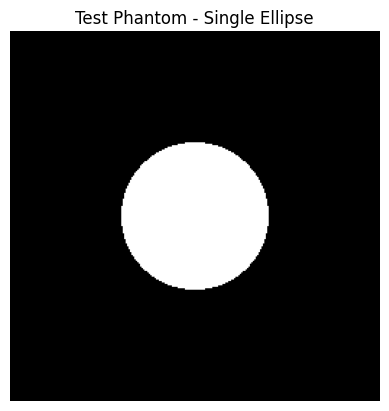

In [ ]:
# Test the phantom generator with one ellipse
N = 256

# Single ellipse: center (0,0), radius 0.4 x 0.4, angle=0, intensity=1
ellipses = [(0, 0, 0.4, 0.4, 0, 1)]

phantom = SPPhantom_myname(N, ellipses)

plt.imshow(phantom, cmap="gray")
plt.title("Test Phantom - Single Ellipse")
plt.axis("off")
plt.show()

In [ ]:
# This cell generates a phantom with three non-overlapping circles.
# Each circle has diameter ~N/5 (here radius = 1/10 in normalized units).
# Circles are placed to the right, left, and top of the origin.
# The resulting image shows three bright circles on a dark background.

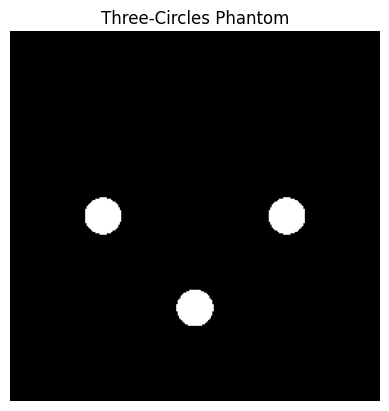

In [ ]:
# Three non-overlapping circles, each diameter ~ N/5
N = 256
r = 1/10   # normalized radius (since diameter ≈ N/5)

ellipses = [
    (0.5, 0, r, r, 0, 1),     # right circle
    (-0.5, 0, r, r, 0, 1),    # left circle
    (0, 0.5, r, r, 0, 1)      # top circle
]

three_circles = SPPhantom_myname(N, ellipses)

plt.imshow(three_circles, cmap="gray")
plt.title("Three-Circles Phantom")
plt.axis("off")
plt.show()

In [ ]:
# This cell checks the background intensity of the phantom.
# All pixels outside the ellipses are initialized to zero, so the background = 0.
# Interpretation: In real MRI, the background would not remain perfectly zero
# due to scanner noise, tissue interfaces, and low-signal regions.

In [ ]:
# Q1.3 - Background Signal Intensity

# Background = pixels not covered by ellipses
background_pixels = three_circles[three_circles == 0]

background_intensity = np.unique(background_pixels)
print("Background intensity =", background_intensity)

print("Interpretation:")
print("In this phantom, the background is zero.")
print("In a realistic phantom, the background would have a small non-zero signal due to noise or other tissues.")

Background intensity = [0.]
Interpretation:
In this phantom, the background is zero.
In a realistic phantom, the background would have a small non-zero signal due to noise or other tissues.


In [ ]:
# This cell assigns MRI physical properties (So, T1, T2) to each phantom compartment.
# Example values are chosen from literature for three tissue types:
# - Adipose tissue (low water content, short T1, long T2)
# - Muscle tissue (moderate water content, intermediate T1 and short T2)
# - Blood (high water content, long T1 and long T2)
# Each compartment is masked and filled with the corresponding So, T1, T2 values,
# creating 3 property maps (So_map, T1_map, T2_map).

In [ ]:
# Q2.1 - Assign Physical Properties to Phantom Compartments

# Define So, T1, T2 values (example values from literature)
SoA, SoB, SoC = 0.1, 0.7, 0.85
T1A, T1B, T1C = 250, 870, 1200   # ms
T2A, T2B, T2C = 80, 50, 200      # ms

# Initialize property maps
So_map = np.zeros((N,N))
T1_map = np.zeros((N,N))
T2_map = np.zeros((N,N))

# Assign each ellipse a tissue type
for idx, e in enumerate(ellipses):
    mask = ellipse_matrix(N, *e) > 0
    if idx == 0: So, T1, T2 = SoA, T1A, T2A   # adipose
    if idx == 1: So, T1, T2 = SoB, T1B, T2B   # muscle
    if idx == 2: So, T1, T2 = SoC, T1C, T2C   # blood
    So_map[mask] = So
    T1_map[mask] = T1
    T2_map[mask] = T2

In [ ]:
# This cell displays the three property maps (So, T1, T2).
# Each subplot shows the spatial distribution of one property across the phantom.
# Colorbars indicate the numerical values assigned to each compartment.
# Together, these maps represent the physical characteristics of the simulated tissues.

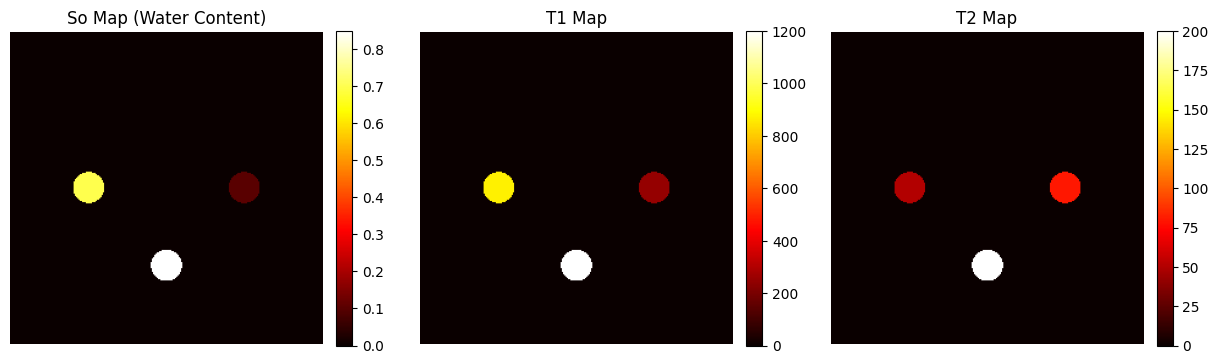

In [ ]:
# Q2.2 - Display So, T1, T2 Maps

fig, axs = plt.subplots(1,3,figsize=(15,5))

im0 = axs[0].imshow(So_map, cmap="hot")
axs[0].set_title("So Map (Water Content)")
plt.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

im1 = axs[1].imshow(T1_map, cmap="hot")
axs[1].set_title("T1 Map")
plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

im2 = axs[2].imshow(T2_map, cmap="hot")
axs[2].set_title("T2 Map")
plt.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)

for ax in axs:
    ax.axis("off")

plt.show()

In [ ]:
# These cells defines a simple MRI scanner simulation function MRI_SI.
# The function applies the SI formula: SI = So * (2 - exp(-TR/T1)) * exp(-TE/T2).
# The scanner is run for three sets of parameters (TR=50, 250, 1000; TE=10).
# Three grayscale images (SI1, SI2, SI3) are generated, showing contrast changes
# as TR increases while TE is fixed.
# Interpretation: Short TR suppresses signals, while long TR allows stronger signals to appear.

In [ ]:
# Q2.3 - MRI Scanner Function
def MRI_SI(So_map, T1_map, T2_map, TR, TE):
    SI = So_map * (2 - np.exp(-TR/T1_map)) * np.exp(-TE/T2_map)
    return SI

/tmp/ipython-input-907014341.py:3: RuntimeWarning: divide by zero encountered in divide
  SI = So_map * (2 - np.exp(-TR/T1_map)) * np.exp(-TE/T2_map)


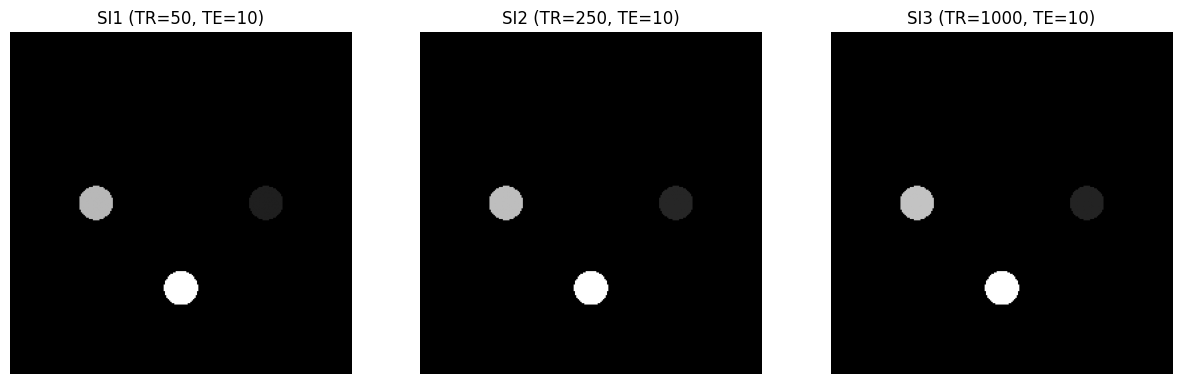

In [ ]:
# Run scanner with different TR/TE values
SI1 = MRI_SI(So_map, T1_map, T2_map, TR=50, TE=10)
SI2 = MRI_SI(So_map, T1_map, T2_map, TR=250, TE=10)
SI3 = MRI_SI(So_map, T1_map, T2_map, TR=1000, TE=10)

# Plot results
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].imshow(SI1, cmap="gray"); axs[0].set_title("SI1 (TR=50, TE=10)")
axs[1].imshow(SI2, cmap="gray"); axs[1].set_title("SI2 (TR=250, TE=10)")
axs[2].imshow(SI3, cmap="gray"); axs[2].set_title("SI3 (TR=1000, TE=10)")

for ax in axs: ax.axis("off")
plt.show()

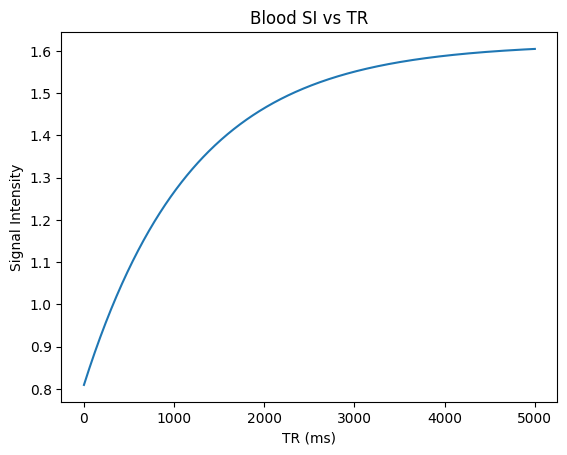

In [ ]:
import numpy as np

# For each tissue, calculate SI across TR values
TR_values = np.linspace(1, 5000, 500)  # TR range
TE = 10  # fixed

def signal_vs_TR(So, T1, T2, TR_values, TE):
    return So * (2 - np.exp(-TR_values/T1)) * np.exp(-TE/T2)

# Example: blood
SI_blood = signal_vs_TR(0.85, 1200, 200, TR_values, TE)

import matplotlib.pyplot as plt
plt.plot(TR_values, SI_blood)
plt.title("Blood SI vs TR")
plt.xlabel("TR (ms)")
plt.ylabel("Signal Intensity")
plt.show()

In [ ]:
# This cell analyzes how signal intensity changes with TR for one tissue type (blood).
# The plot shows SI rising quickly at low TR values and then plateauing at high TR.
# Analytically, SI never reaches zero for finite TR (exp(-TR/T1) can’t equal 2).
# The only way to force SI → 0 is to let TE → ∞, since exp(-TE/T2) then goes to zero.
# Conclusion: The experiment confirms that varying TR alone cannot nullify the signal.